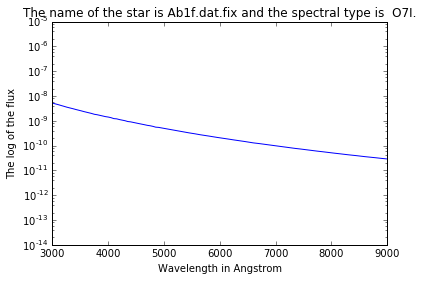

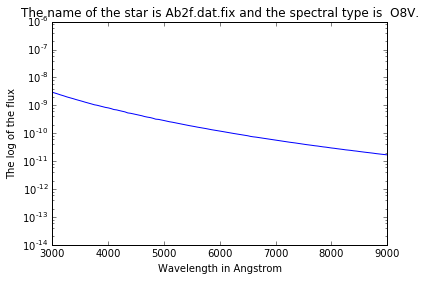

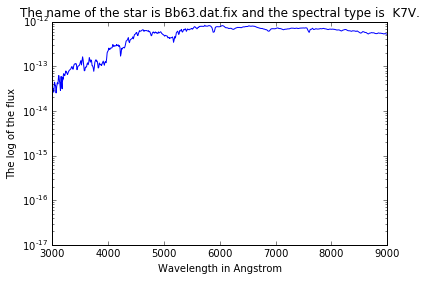

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def read(name):
    return(pd.read_csv(name))

def calculating(name):
    wavelength_and_flux = read(name)
    spectra = read("spectra.list.csv")
    
    # Series are directly iterable (like a list)
    j = 0
    for i in spectra['#filename']:
        j = j + 1
        if(i == name):
            type_name = spectra[' type'][j]
       
    #genormaliseerd flux
    wavelength_and_flux[' flux'] = wavelength_and_flux[' flux']/wavelength_and_flux.sum(axis = 1)
    
    return("The name of the star is " + name + " and the spectral type is " + type_name + ".", wavelength_and_flux['# wavelength'], wavelength_and_flux[' flux'])

def plot(title, x, y):
    plt.plot(x, y)
    plt.yscale("log")
    plt.ylabel("The log of the flux")
    plt.xlabel("Wavelength in Angstrom")
    plt.xlim(3000,9000)
    plt.title(title)
    plt.show()

a, b, c = calculating("Ab1f.dat.fix")
plot(a, b, c)

a, b, c = calculating("Ab2f.dat.fix")
plot(a, b, c)

a, b, c = calculating("Bb63.dat.fix")
plot(a, b, c)

In [16]:
#import seaborn as sns
from bokeh.models import Title
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()

def plotbokeh(title, x, y):
    #Plotting with Bokeh(trying it out)
    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))
    p.line(x=x, y=y)
    p.add_layout(Title(text="The log of the flux", align="center"), "left")
    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")
    p.grid.grid_line_color = None
    show(p, notebook_handle=True)
    
a, b, c = calculating("Ab1f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Ab2f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Bb63.dat.fix")
plotbokeh(a, b, c)

Loading BokehJS ...

2.
a)An Angstrom($\si{\angstrom}$) is 10$^{-10}$ m.
b)The unit of flux density is in SI units W/m$^2$ and another unit can be the Jansky.
c)

In [21]:
iets = read('vega.fnu.csv')
iets.flux = iets.flux*3e16
name_filter = ["U", "B", "V"]
lambd_0 = [3659, 4582, 5448]
lambd_delta = [660, 940, 880]
for i in range(3):
    iets.loc[(iets['#wavelength'] >= lambd_0[i]-lambd_delta[i]/2) & (iets['#wavelength'] <= lambd_0[i]+lambd_delta[i]/2), 'flux']
    print("C_x for the filter", name_filter[i])
    print(2.5*np.log10(np.trapz(iets.loc[(iets['#wavelength'] >= lambd_0[i]-lambd_delta[i]/2) & (iets['#wavelength'] <= lambd_0[i]+lambd_delta[i]/2), 'flux'],iets.loc[(iets['#wavelength'] >= lambd_0[i]-lambd_delta[i]/2) & (iets['#wavelength'] <= lambd_0[i]+lambd_delta[i]/2), '#wavelength'])/(np.trapz(iets.loc[(iets['#wavelength'] >= lambd_0[i]-lambd_delta[i]/2) & (iets['#wavelength'] <= lambd_0[i]+lambd_delta[i]/2), '#wavelength'], iets.loc[(iets['#wavelength'] >= lambd_0[i]-lambd_delta[i]/2) & (iets['#wavelength'] <= lambd_0[i]+lambd_delta[i]/2), '#wavelength']))))

C_x for the filter U
-19.2076563078
C_x for the filter B
-19.9119447722
C_x for the filter V
-20.4449839027
